In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras import optimizers

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [10]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [11]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [15]:
def nin_model():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), kernel_size = (3, 3), filters = 50, strides = (1, 1), kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (1, 1), filters = 25, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (3, 3), filters = 50, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (1, 1), filters = 25, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (3, 3), filters = 50, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (1, 1), filters = 25, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (3, 3), filters = 50, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(kernel_size = (1, 1), filters = 10, kernel_initializer = 'he_normal', strides = (1, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['acc'])
    
    return model

In [18]:
model = nin_model()
history = model.fit(x_train, y_train, verbose = 2, epochs = 20, validation_split = 0.3, batch_size = 50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 88s - loss: 1.3490 - acc: 0.8414 - val_loss: 0.8546 - val_acc: 0.9122
Epoch 2/20
 - 86s - loss: 0.7022 - acc: 0.9406 - val_loss: 0.5067 - val_acc: 0.9443
Epoch 3/20
 - 86s - loss: 0.4618 - acc: 0.9560 - val_loss: 0.3369 - val_acc: 0.9666
Epoch 4/20
 - 86s - loss: 0.3380 - acc: 0.9637 - val_loss: 0.2585 - val_acc: 0.9677
Epoch 5/20
 - 86s - loss: 0.2598 - acc: 0.9708 - val_loss: 0.2203 - val_acc: 0.9721
Epoch 6/20
 - 87s - loss: 0.2114 - acc: 0.9731 - val_loss: 0.1561 - val_acc: 0.9797
Epoch 7/20
 - 87s - loss: 0.1758 - acc: 0.9766 - val_loss: 0.1334 - val_acc: 0.9827
Epoch 8/20
 - 86s - loss: 0.1506 - acc: 0.9778 - val_loss: 0.1268 - val_acc: 0.9791
Epoch 9/20
 - 86s - loss: 0.1321 - acc: 0.9788 - val_loss: 0.1111 - val_acc: 0.9776
Epoch 10/20
 - 86s - loss: 0.1152 - acc: 0.9817 - val_loss: 0.0978 - val_acc: 0.9848
Epoch 11/20
 - 86s - loss: 0.1051 - acc: 0.9825 - val_loss: 0.1034 - val_acc: 0.9788
Epoch 12/20
 - 86s - los

In [17]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

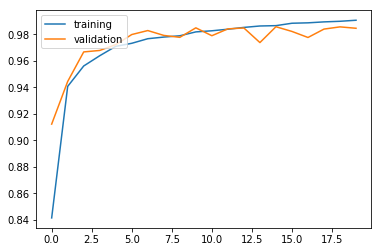

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [21]:
result = model.evaluate(x_test, y_test)
print(result[1])

10000/10000 [==============================] - 6s 638us/step
0.9847


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 50)        200       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 25)        1275      
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 25)        100       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 25)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 50)        11300     
__________